# Final Project for 395: Covid Time Series Machine Learning Exploration

## Chelsea Fell

## Description and purpose of final project

The goal of this final project is to explore this covid-19 dataset by using machine learning algorithms. The purpose is to explore the dataset and see if any of the machine learning algorithms have accurate and rational predictions of covid-19 cases. I will be analyzing three different time series forecasting methods and evaluating their results based on their accuracy and simple ration to determine if the result is logical or not.

## Background on my dataset: 

My dataset is a combination of two Johns Hopkins covid time series datasets that have been combined into one. The first dataset is a time series of the cumulative number of vaccinated individuals in a specific area of a state on a certain date. The second dataset is a time series of the cumulative number of individuals that have contracted covid-19 in a specific area of a state on a certain date. The datasets are from February 1st, 2022. Johns Hopkins pulically provides this raw data for anyone to use on any type of analysis. The two datasets can be found here:

https://github.com/govex/COVID-19/tree/master/data_tables/vaccine_data/us_data 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

The dataset I created from these is still a time series that includes data on the date, cumulative number of cases on the date, FIPS (Federal Information Processing Standards), the state, country, latitude, longitude, combined key (State, Country), cumulative number of people fully vaccinated on the date, and cumulative number of people partially vaccinated on the date. This subset of the two original John Hopkins datasets was created from my midterm final project from this 395 class and saved as a csv for easier use later on. 

## Part 1: Exploring my covid dataset with pandas

In [2]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

The lines of code below use the functions ".head(5)", ".info()", and ".describe()" to explore basic aspects of the data like what type of data is in the columns and things like the mean that can all be visualized below. 

In [3]:
covid = pd.read_csv("covid_data.csv")
covid.head(5)

,Unnamed: 0,Cases,FIPS,Province_State,Country_Region,Date,Lat,Long_,Combined_Key,People_Fully_Vaccinated,People_Partially_Vaccinated
0,0,284922.0,1.0,Alabama,US,2020-12-10,32.3182,-86.9023,"Alabama, US",NaN,NaN
1,1,288775.0,1.0,Alabama,US,2020-12-11,32.3182,-86.9023,"Alabama, US",NaN,NaN
2,2,292841.0,1.0,Alabama,US,2020-12-12,32.3182,-86.9023,"Alabama, US",NaN,NaN
3,3,295631.0,1.0,Alabama,US,2020-12-13,32.3182,-86.9023,"Alabama, US",NaN,NaN
4,4,297895.0,1.0,Alabama,US,2020-12-14,32.3182,-86.9023,"Alabama, US",NaN,NaN


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25452 entries, 0 to 25451
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   25452 non-null  int64  
 1   Cases                        23464 non-null  float64
 2   FIPS                         23464 non-null  float64
 3   Province_State               25452 non-null  object 
 4   Country_Region               25452 non-null  object 
 5   Date                         25452 non-null  object 
 6   Lat                          23464 non-null  float64
 7   Long_                        23464 non-null  float64
 8   Combined_Key                 25452 non-null  object 
 9   People_Fully_Vaccinated      23093 non-null  float64
 10  People_Partially_Vaccinated  22411 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 2.1+ MB


In [5]:
covid.describe()

,Unnamed: 0,Cases,FIPS,Lat,Long_,People_Fully_Vaccinated,People_Partially_Vaccinated
count,25452.000000,2.346400e+04,23464.000000,23464.000000,23464.000000,2.309300e+04,2.241100e+04
mean,12725.500000,6.722689e+05,32.535714,36.840089,-85.206614,2.351700e+06,5.496026e+05
std,7347.503862,8.813180e+05,18.905206,10.789622,49.309263,3.520145e+06,8.508944e+05
min,0.000000,0.000000e+00,1.000000,-14.271000,-170.132000,0.000000e+00,1.515000e+03
25%,6362.750000,1.336855e+05,17.750000,34.594600,-101.165775,3.468410e+05,1.046340e+05
50%,12725.500000,4.117930e+05,31.500000,39.061850,-87.944200,1.142832e+06,3.028480e+05
75%,19088.250000,8.420120e+05,46.250000,42.361650,-76.970625,2.907552e+06,5.917365e+05
max,25451.000000,8.477892e+06,78.000000,61.370700,145.673900,2.756545e+07,7.310293e+06


## Part 2: Preprocessing the data

In [6]:
import seaborn as sns

The function ".isnull()" and the heatmap below are checking to see if there are null values within the data. Steps to deal with the NaNs and how they are being dealt with are explained below. 

In [7]:
covid.isnull()

,Unnamed: 0,Cases,FIPS,Province_State,Country_Region,Date,Lat,Long_,Combined_Key,People_Fully_Vaccinated,People_Partially_Vaccinated
0,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
25447,False,False,False,False,False,False,False,False,False,False,False
25448,False,False,False,False,False,False,False,False,False,False,False
25449,False,False,False,False,False,False,False,False,False,False,False
25450,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

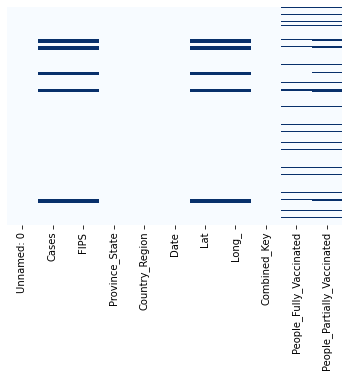

In [8]:
sns.heatmap(covid.isnull(), yticklabels = False, cbar = False, cmap="Blues")

Since the data contains null values as seen through the ".isnull()" function and heatmap, the NaN values need to be replaced. The only relevant values that need to be replaced are in three columns: "Cases", "People_Fully_Vaccinated", and "People_Partially_Vaccinated". The machine learning algorithms will really focus on the "Cases" column and the "Date" column which contains no NaNs. The NaNs in all three columns will be replaced with 0. For "Cases", this is because at the beginning of covid, some states did not have any cases while others were getting their first few. Also, throughout covid certain areas of states had no covid cases depending on how strict their lockdown was, so all NaNs in "Cases" logically will be replaced with 0. In the "People_Fully_Vaccinated" and "People_Partially_Vaccinated" columns, the NaNs will also be replaced with 0 because in the beginning of the covid-19 pandemic, there were no vaccines and therefore there would be 0 people vaccinated on many dates. Also, throughout the pandemic even when vaccines started becoming available, not all states or regions had access to vaccines, so it is logical that all NaNs for these two columns should also be replaced with 0. The code for replacing NaN values and code to make sure the NaNs were filled is executed below.

In [9]:
covid['People_Fully_Vaccinated'] = covid['People_Fully_Vaccinated'].fillna(0)
covid['People_Partially_Vaccinated'] = covid['People_Partially_Vaccinated'].fillna(0)
covid['Cases'] = covid['Cases'].fillna(0)
covid.head()

,Unnamed: 0,Cases,FIPS,Province_State,Country_Region,Date,Lat,Long_,Combined_Key,People_Fully_Vaccinated,People_Partially_Vaccinated
0,0,284922.0,1.0,Alabama,US,2020-12-10,32.3182,-86.9023,"Alabama, US",0.0,0.0
1,1,288775.0,1.0,Alabama,US,2020-12-11,32.3182,-86.9023,"Alabama, US",0.0,0.0
2,2,292841.0,1.0,Alabama,US,2020-12-12,32.3182,-86.9023,"Alabama, US",0.0,0.0
3,3,295631.0,1.0,Alabama,US,2020-12-13,32.3182,-86.9023,"Alabama, US",0.0,0.0
4,4,297895.0,1.0,Alabama,US,2020-12-14,32.3182,-86.9023,"Alabama, US",0.0,0.0


In [10]:
covid.isnull()

,Unnamed: 0,Cases,FIPS,Province_State,Country_Region,Date,Lat,Long_,Combined_Key,People_Fully_Vaccinated,People_Partially_Vaccinated
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
25447,False,False,False,False,False,False,False,False,False,False,False
25448,False,False,False,False,False,False,False,False,False,False,False
25449,False,False,False,False,False,False,False,False,False,False,False
25450,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

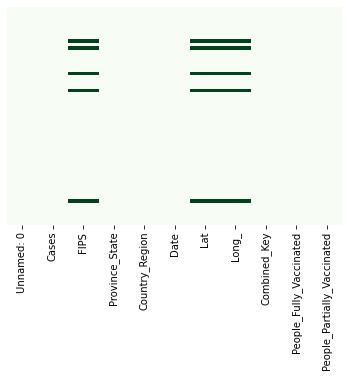

In [11]:
sns.heatmap(covid.isnull(), yticklabels = False, cbar = False, cmap="Greens")

For the purpose of this project, I am going to drop columns: "Unamed: 0", "FIPS", "Country_Region", "Lat", "Long_", and "Combined_key". These columns are irrelevant to any forecasting methods I will be using because most of them are geography based and would be relevant in a geopandas analysis. The code is executed below with the ".head(5)" function to show that the columns were dropped.

In [12]:
covid = covid.drop(['Unnamed: 0', 'FIPS', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis = 1)
covid.head(5)

,Cases,Date,People_Fully_Vaccinated,People_Partially_Vaccinated
0,284922.0,2020-12-10,0.0,0.0
1,288775.0,2020-12-11,0.0,0.0
2,292841.0,2020-12-12,0.0,0.0
3,295631.0,2020-12-13,0.0,0.0
4,297895.0,2020-12-14,0.0,0.0


The next two sections of code are just visualizing the case data since that is the main column the machine learning algorithms and code will be working with.

Also, this is a side not for all the graphs that the y-axis is 1 e6 because the number of cases are so large.

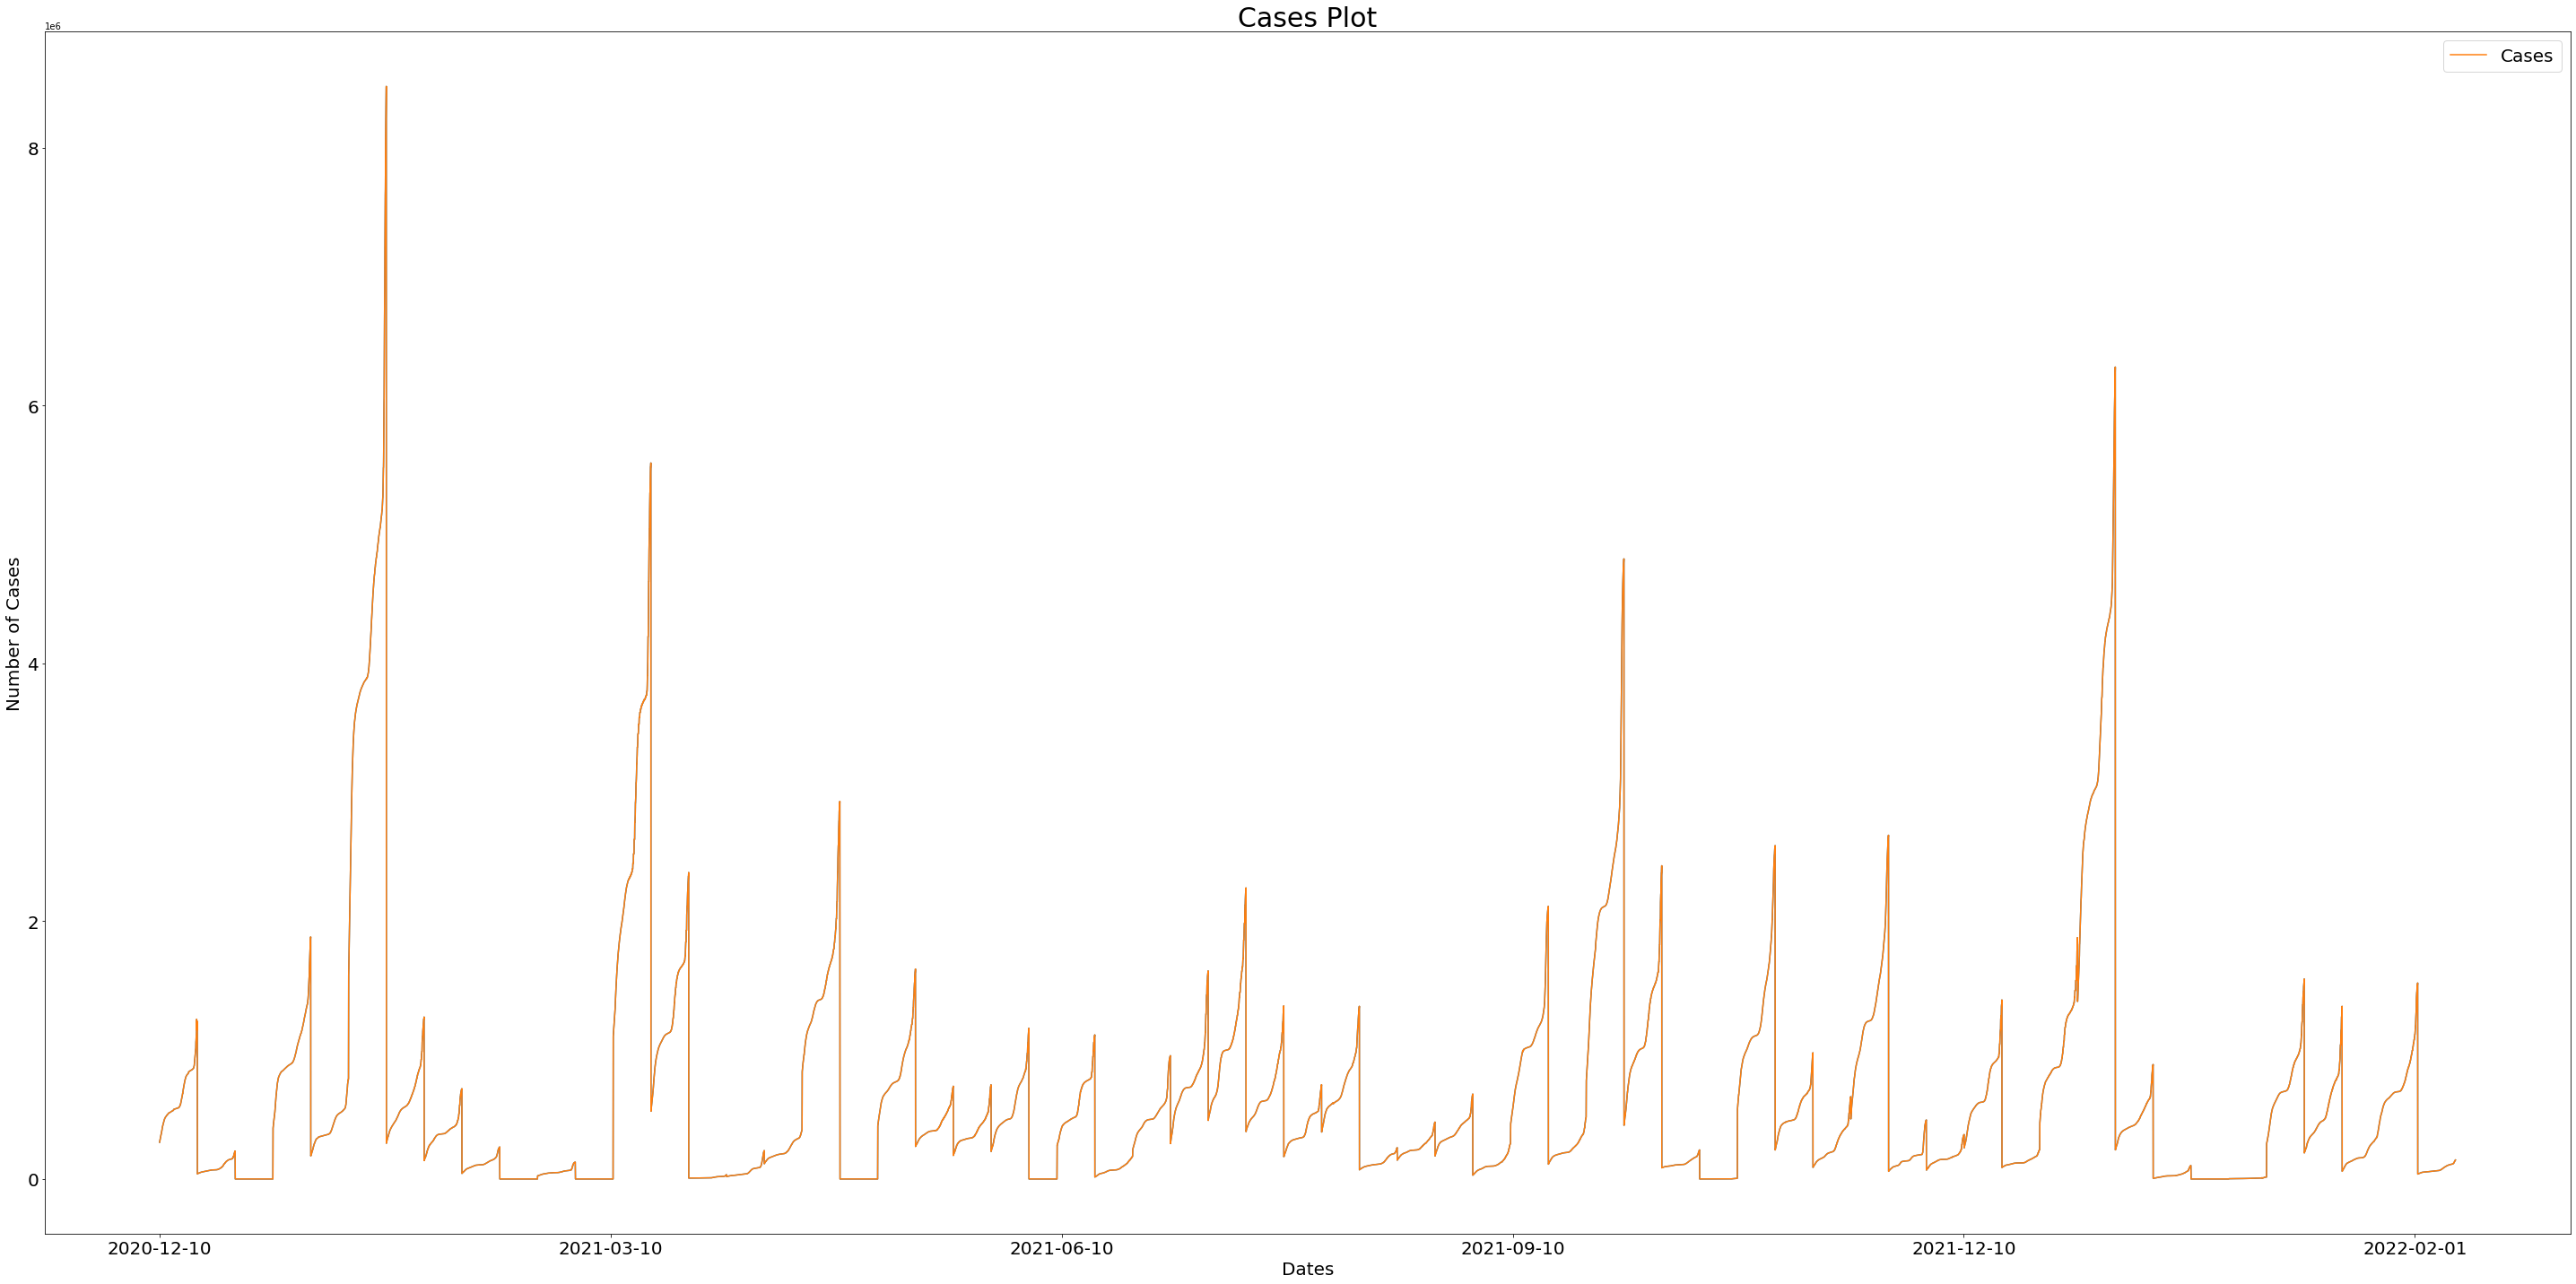

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

covid_1 = covid['Cases']
plt.rcParams["figure.figsize"] = [40.0, 20.0]
plt.rcParams["figure.autolayout"] = True

ax.plot(covid_1)
covid_1.plot()
ax.set_xticklabels(['', '2020-12-10','2021-03-10', '2021-06-10', '2021-09-10', '2021-12-10', '2022-02-01'], fontsize=20)

plt.yticks(fontsize=20)

plt.title('Cases Plot', fontsize=30)
plt.ylabel('Number of Cases', fontsize=20)
plt.xlabel('Dates', fontsize=20)

plt.legend(fontsize=20)
plt.show()

## Part 3/4: Visualizing Data with Analyses

All of the models will be focused on covid-19 cases.

## Part a: Autoregression:

This is the frist data visualization. I chose to use an autoregression because it models the next steps in a sequence as a linear function of the observations from prior time steps. It is a simple method to visualize the covid data and predict future steps. I will analyze the autoregression's prediction accuracy at the end of this section of modeling the autoregression.

In [19]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
import numpy as np
import warnings

Before performing the autogression model, a test for autocorrelation needs to be performed. This test for autocorrelation determines how many lags there should be in the autoregression model. The ".plot_acf()" function is a statsmodel that can show which lags have strong correlation to the forecasted value. The statsmodel below show that appoximately lag 155 goes above the green line indicating a strong/high correlation. So, the autoregression model will have 155 lags.

Terminology:

Autocorrelation is the relationship or correlation between elements of a series and other elements from the same series separated from each other by a given interval.
Lags are data points across time.

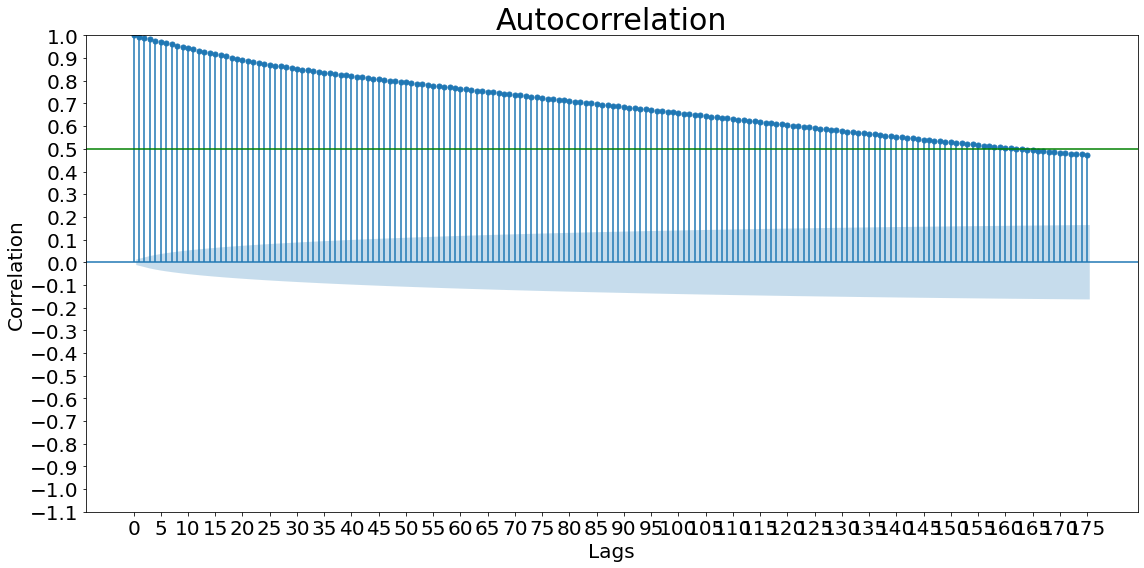

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,8))
plot_acf(covid['Cases'], lags=175, ax=ax)

#the autocorrelation has a y-axis down to -1 to make sure there are no negative correlations
plt.ylim([-1,1])
plt.yticks(np.arange(-1.1, 1.1, 0.1), fontsize = 20)
plt.xticks(np.arange(0, 180, 5), fontsize = 20)
plt.axhline(y=0.5, color="green")

plt.xlabel('Lags', fontsize= 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('Autocorrelation', fontsize = 30)

plt.show()

This is the beginning of creating the autoregression model. This first part is splitting the data into the training and test data sets. The training dataset will have 1000 points and the test will have everything but those 1000 data points. 1000 data points were chosen because the dataset has over 25000 rows, so taking out 1000 to train the training set on is not detrimental to the test set which has still has plenty of values. After splitting the datasets, the autoregression model is created with the number of lags that were found from the autocorrelation test above. 

In [21]:
df_train_a = covid['Cases'].iloc[:-1000]
df_test_a = covid['Cases'].iloc[-1000:]

from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(df_train_a, lags=155).fit()

Here, the ".forecast()" function is used on the model to make the prediction of covid-19 cases. The print statement prints the forecasts next to the actual value in the test data and then print the difference between the two numbers. Only the first five are printed to show a sample of the forecasts compared to the actual value. 

In [22]:
forecasts = model.forecast(1000).tolist()
test_values = df_test_a.tolist()
print(forecasts[1], test_values[1], forecasts[1] - test_values[1])
print(forecasts[2], test_values[2], forecasts[2] - test_values[2])
print(forecasts[3], test_values[3], forecasts[3] - test_values[3])
print(forecasts[4], test_values[4], forecasts[4] - test_values[4])
print(forecasts[5], test_values[5], forecasts[5] - test_values[5])

184396.89218144273 181906.0 2490.8921814427304
186557.35480648413 183354.0 3203.3548064841307
188729.97642492596 184682.0 4047.9764249259606
190871.51556369127 186293.0 4578.515563691268
192989.5315393298 187519.0 5470.531539329793


This is the numeric metric used as one way to evaluate the performance of the model, the ".mean_squared_error()" function. The number from the print statement indicates that the prediction is incredibly far off from the average.

In [23]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts))

158410627601.70145


This is the autoregression model of the forecasts (green) compared to the test values (blue). 

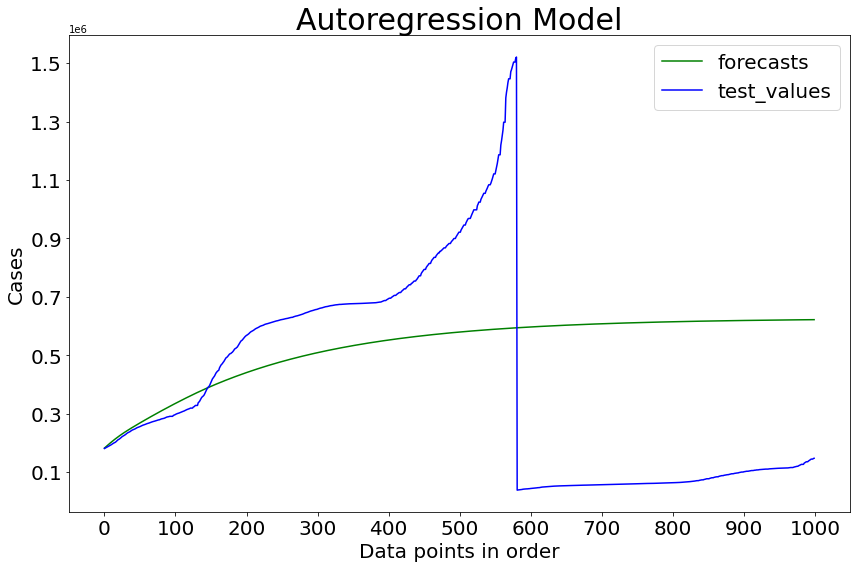

In [24]:
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green", label="forecasts")
plt.plot(test_values,color="blue", label="test_values")

plt.xticks(np.arange(0,1100,100), fontsize = 20)
plt.yticks(np.arange(100000, 1600000, 200000), fontsize = 20)

plt.title('Autoregression Model', fontsize = 30)
plt.xlabel('Data points in order', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)

plt.legend(fontsize = 20)

plt.show()

Analysis/Conclusion of the Autoregression Model:

Overall, this model is incredibly poor at predicting covid-19 cases. As seen in the Autoregression Model above, the prediction line is usually incredibly far off from the actaul test values line. Also, the mean squared error function indicates the model is really far off from the actual data points. This could partly be because of the variation in cases throughout the pandemic, when vaccination came out, there were less cases compared to before vaccinations. Also, it is hard to predict the trends in covid-19 cases becuase of the introduction of new variants that can be spread more easily. In conclusion for the autoregression model, it is pretty inaccurate, but the overall trend of increasing cases is approximately correct and logical. This is not the best model for predicting covid-19 cases.

## Part b: Moving Average

For the next part of the project, I'm taking the moving average of the case data. The moving average method models the next step in a sequence as a linear function of the residual errors from a mean proecess at prior time steps. 

In [25]:
from statsmodels.tsa.arima_model import ARMA

This is the function that takes in the training and test set from the original covid dataset. This function returns a new dataset that contains the predicted and actual values of the dataset.

In [26]:
def MA_model(train,test):
    
    # fit model
    model = ARMA(train, order=(0, 1))
    model_fit = model.fit(disp=False)
    
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test.values})
    return res

Similar to the previous autoregression model, it is also using a training and test set. The training set is the last 10000 datapoints and the test set is everything but those last 10000 datapoints. 10000 datapoints were used so that it is easy to see the results on the graph. The first bit of code calls the function created above and creates the new dataset with the actual and predicted covid-19 case trend. The rest of the code is just plotting out the model.

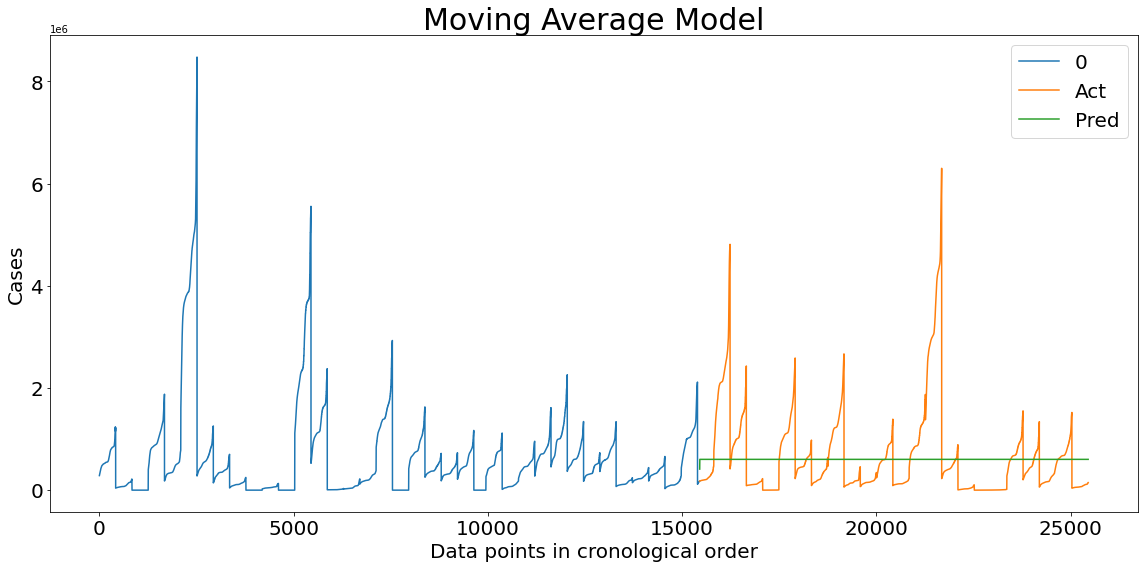

In [27]:
df_train_ma = covid['Cases'].iloc[:-10000]
df_test_ma = covid['Cases'].iloc[-10000:]
    
df_ret_ma = MA_model(df_train_ma, df_test_ma)
data_ma = pd.concat([df_train_ma, df_ret_ma])

data_ma.plot(label='CASES',figsize=(16, 8))

plt.title('Moving Average Model', fontsize = 30)
plt.xlabel('Data points in cronological order', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.legend(fontsize = 20)

plt.show()

Analysis/Conclusion of the Moving Average Model:

Overall, this model is pretty poor at predicting covid-19 case trends. As shown in the model above, the green line predicting covid-19 trends is pretty inaccurate compared to the actual case count. This model does not take into account seasonal trends or other variants. Although, the prediction line is an accurate average of the cases.

## Part c: Autoregressive Moving Average



For the last model, I am taking the autoregressive moving average of the covid-19 case data which combines the autoregression and moving average models. This method models the next step in the sequence as a linear function of the observations and residual errors at prior time steps.

In [28]:
from statsmodels.tsa.arima_model import ARMA

This is the function that takes the training and test sets and converts them into a new dataset.

In [29]:
def ARMA_model(train,test):
    
    # fit model
    model = ARMA(train, order=(1,2))
    model_fit = model.fit(disp=False)
    
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test.values})
    return res

Similar to the last model, this model takes the last 10000 points as the training set and then everything but those last 10000 points as the test set and runs the autoregressive moving average function above. The rest of the code is just plotting the new dataset and showing the actual and predicted lines.

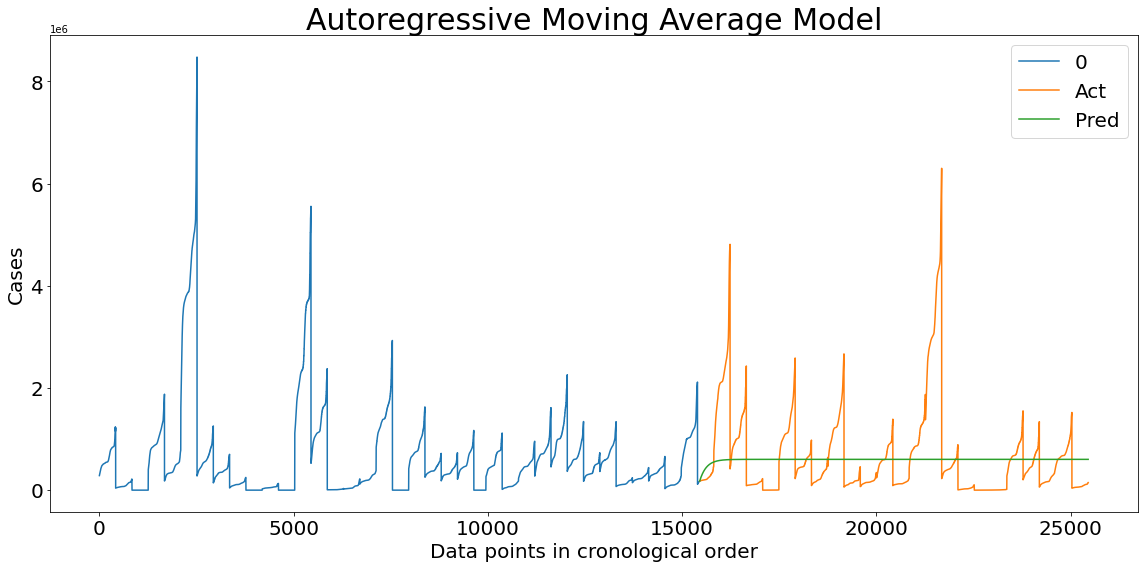

In [30]:
df_train_ama = covid['Cases'].iloc[:-10000]
df_test_ama = covid['Cases'].iloc[-10000:]


df_ret_ama = ARMA_model(df_train_ama, df_test_ama)
data_ama = pd.concat([df_train_ama, df_ret_ama])

data_ama.plot(label='CASES',figsize=(16, 8))


plt.title('Autoregressive Moving Average Model', fontsize = 30)
plt.xlabel('Data points in cronological order', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.legend(fontsize = 20)

plt.show()

Analysis/Conclusion of the Autoregressive Moving Average Model:

Overall, this model is also a pretty poor estimation of covid-19 case data. The prediction line does start from the actual covid-19 case data line, but the rest of the line does not match the trends from the actual datapoints. Similar to the last two models, it is not good at predictining the ups and downs of the case surges throughout the dates. 

## Part 5: Conclusion

In conclusion, the machine learning models used in this jupyter notebook were pretty inaccurate. The autoregression model, moving average model, and autoregressive moving average model were all very off the mark for predicting covid-19 trends which can be seen through the plots. Covid-19 trends move in many different directions and are very erratic, so these models have a hard time predicting the trends. This was an interesting assigment testing out different machine learning models. Although they did not perform very well, it was interesting and fun to see the results.

Sources:

https://www.kaggle.com/code/sajikim/time-series-forecasting-methods-example-python/notebook
https://towardsdatascience.com/how-to-use-an-autoregressive-ar-model-for-time-series-analysis-bb12b7831024
https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/#:~:text=The%20moving%20average%20%28MA%29%20method%20models%20the%20next,calculating%20the%20moving%20average%20of%20the%20time%20series.
